In [98]:
import inference
import importlib
importlib.reload(inference)

<module 'inference' from 'C:\\Users\\Nagore\\PycharmProjects\\PruebitasMineria\\src\\inference.py'>

# 1. CREATE TRAIN AND TEST EMBEDDINGS

In [ ]:
train,test=inference.create_embeddings()

# 2. LOAD TRAIN AND TEST EMBEDDINGS

In [44]:
train,test=inference.load_embeddings()

Cargando embeddings...
Cargando embeddings...


# 3. CLUSTERING

## 3.1. DBSCAN ORIGINAL

In [67]:
clusters=inference.make_clustering(train)

Hay un total de 59 instancias que son ruido
Del cluster 0 hay 9927 instancias
Del cluster 1 hay 6 instancias
Del cluster 2 hay 8 instancias


BUSCAR INSTANCIAS DEL CLUSTER 1 Y RUIDO DEL TRAIN

In [47]:
inference.buscar_instancias_cluster(train,clusters,-1)

210
253
318
349
408
509
544
916
1394
1594
1757
2403
2681
2767
2812
3132
3458
3654
3702
3756
3878
3901
3946
4386
4486
4679
4724
4806
4970
5118
5131
5274
5296
5577
6053
6728
6861
6959
7046
7097
7790
7930
7972
8332
8365
8398
8564
8732
8902
9184
9224
9253
9353
9370
9425
9483
9592
9913
9993


AÑADIR AL TEST LAS INSTANCIAS TEST QUE NOS INTERESAN

In [48]:
# 2 instancias ruido y 2 del cluster 1
instances_to_add=[210,253,4084,4510]
test= inference.add_instances_to_test(train,test,instances_to_add)

### 3.1.1. ASIGNAR CLUSTERS AL TEST - INSTANCIA MAS CERCANA

In [71]:
clusters_test_instancia=inference.asignar_cluster_test_instancia(train,test,clusters)
print(clusters_test_instancia)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 1, 1]


### 3.1.2. ASIGNAR CLUSTER AL TEST - CENTROIDE MAS CERCANO

In [77]:
clusters_test_centroide,centroides=inference.asignar_cluster_test_centroide(train,test,clusters)
print(clusters_test_centroide)
#print(len(centroides))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


REDUCIR DIMENSIONES

In [80]:
train_reducido,test_reducido, centroides_reducidos=inference.reducir_dim(train,test,centroides)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (104, 768)
Dim test after PCA:  (104, 2)
Dim centroides originally:  (3, 768)
Dim centroides after PCA:  (3, 2)


GRÁFICO - INSTANCIA MAS CERCANA

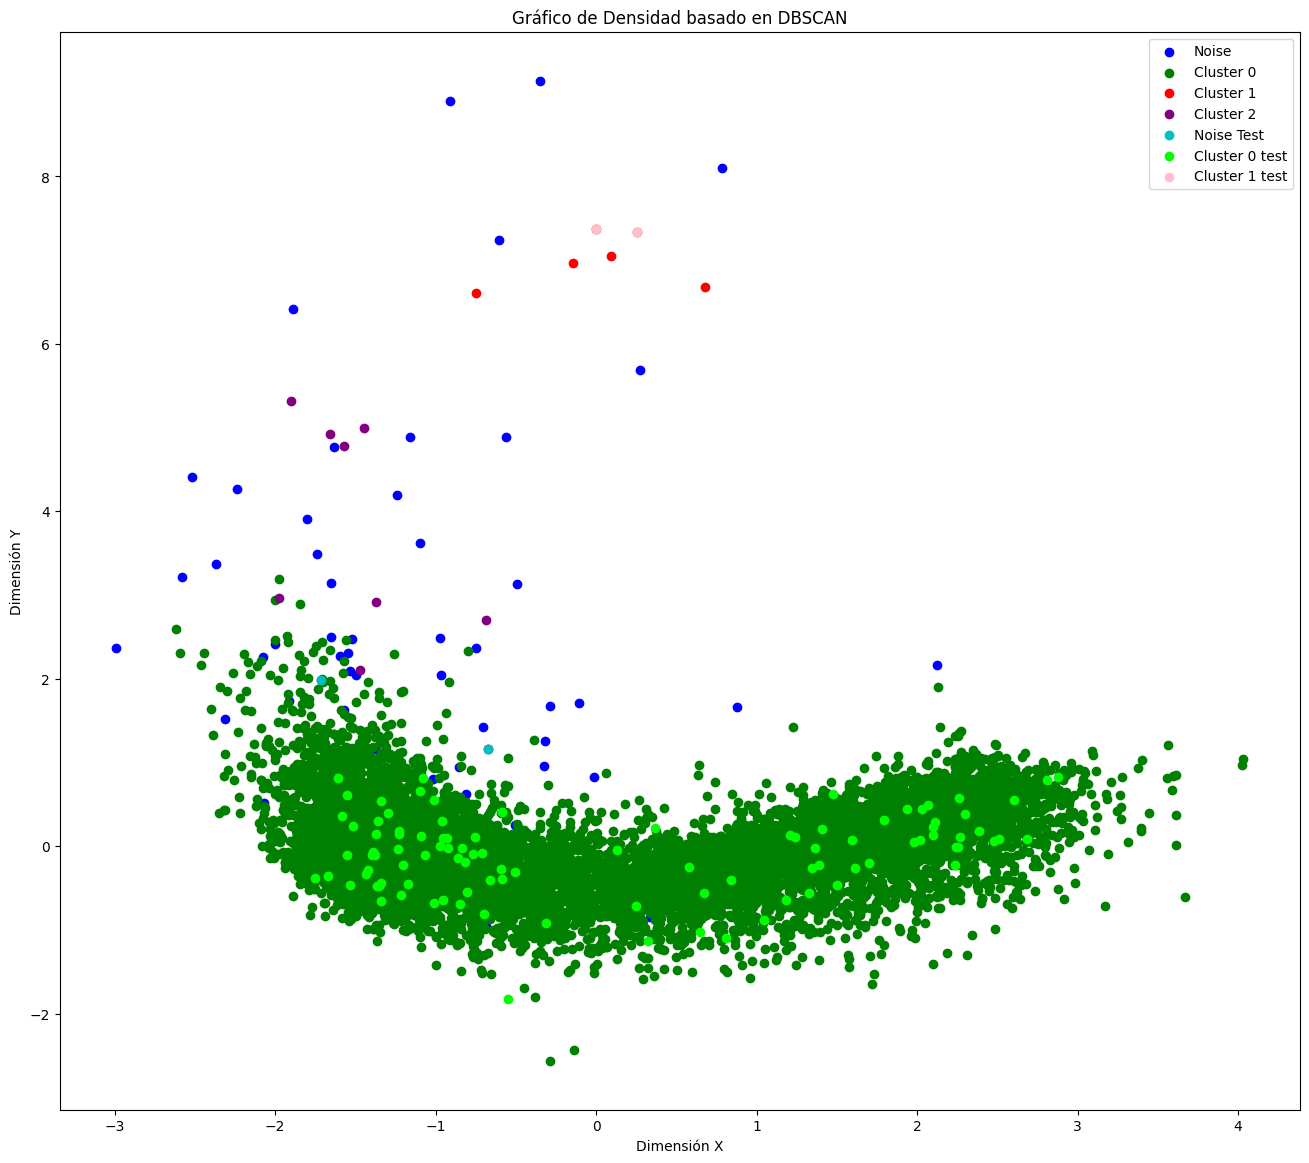

In [83]:
inference.grafico_instancia(train_reducido,clusters,test_reducido,clusters_test_instancia)

GRAFICO - CENTROIDE MAS CERCANO

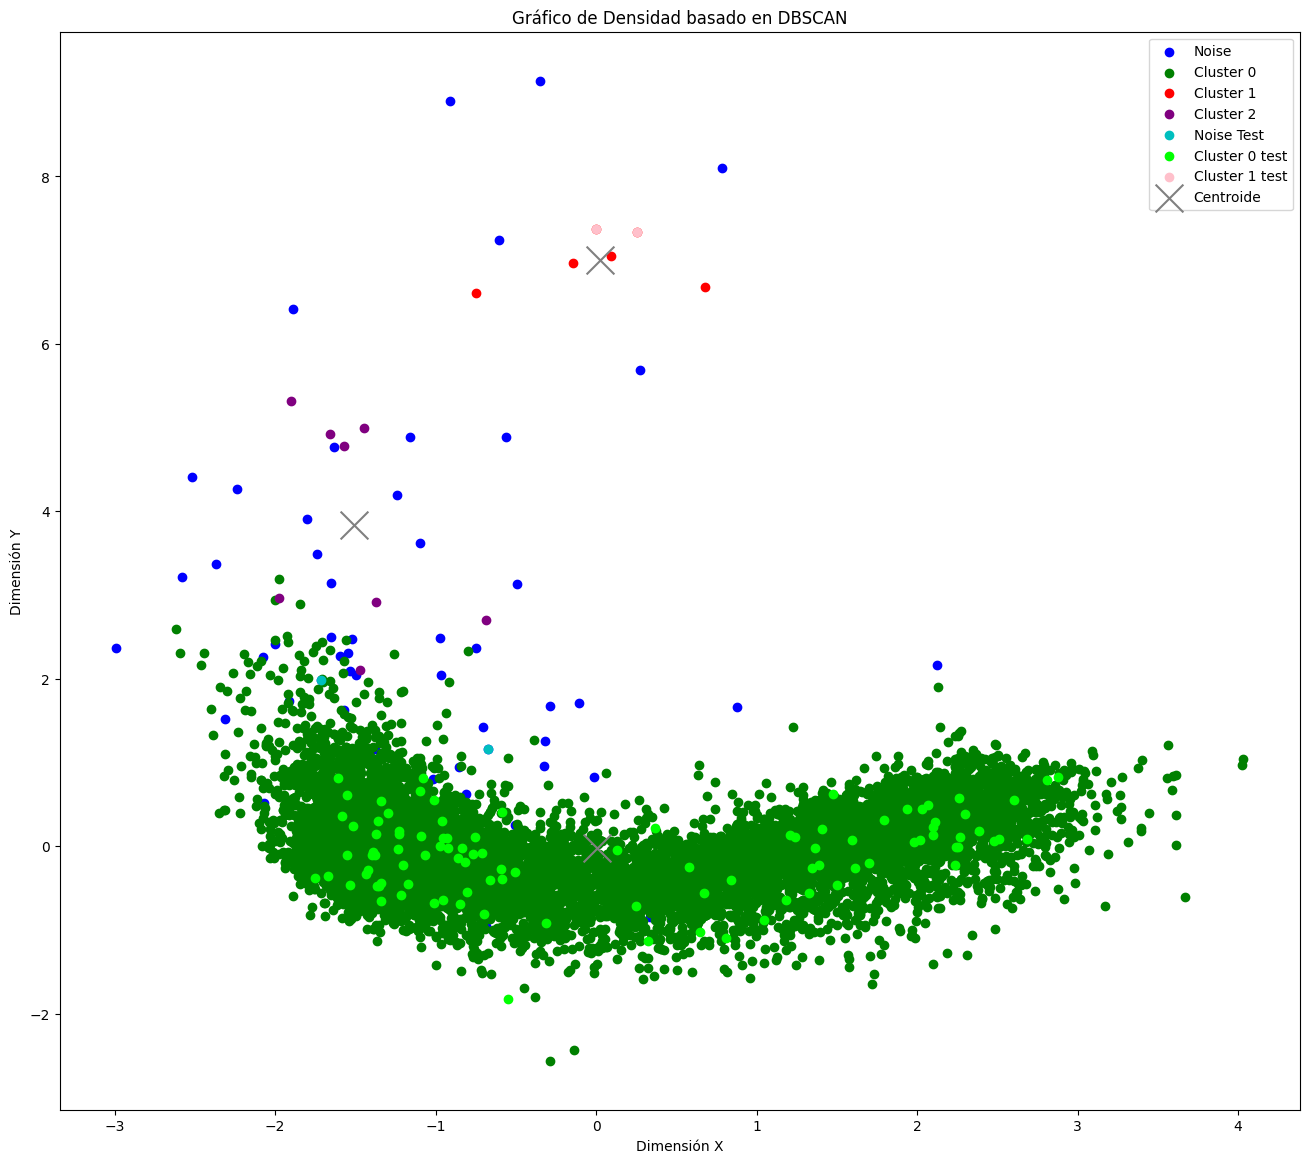

In [94]:
inference.grafico_centroide(train_reducido,clusters,test_reducido,clusters_test_instancia,centroides_reducidos)

## 3.2. DBSCAN IMPLEMENTADO

In [99]:
#da error
clusters=inference.make_clustering(train)

CALCULANDO DISTANCIAS
TOTAL DE 1956428 DISTANCIAS CALCULADAS


TypeError: '<=' not supported between instances of 'NoneType' and 'float'

BUSCAR INSTANCIAS DEL CLUSTER 1 Y RUIDO DEL TRAIN

In [ ]:
inference.buscar_instancias_cluster(train, clusters, -1)

AÑADIR AL TEST LAS INSTANCIAS TEST QUE NOS INTERESAN

In [ ]:
# 2 instancias ruido y 2 del cluster 1
instances_to_add=[210,253,4084,4510]
test= inference.add_instances_to_test(train,test,instances_to_add)

### 3.1.1. ASIGNAR CLUSTERS AL TEST - INSTANCIA MAS CERCANA

In [ ]:
clusters_test_instancia=inference.asignar_cluster_test_instancia(train,test,clusters)
print(clusters_test_instancia)

### 3.1.2. ASIGNAR CLUSTER AL TEST - CENTROIDE MAS CERCANO

In [ ]:
clusters_test_centroide,centroides=inference.asignar_cluster_test_centroide(train,test,clusters)
print(clusters_test_centroide)
#print(len(centroides))

REDUCIR DIMENSIONES

In [ ]:
train_reducido,test_reducido, centroides_reducidos=inference.reducir_dim(train,test,centroides)

GRÁFICO - INSTANCIA MAS CERCANA

In [ ]:
inference.grafico_instancia(train_reducido,clusters,test_reducido,clusters_test_instancia)

GRÁFICO - CENTROIDE MAS CERCANO

In [ ]:
inference.grafico_centroide(train_reducido,clusters,test_reducido,clusters_test_instancia,centroides_reducidos)